In [3]:
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_histogram
from math import pi, sqrt

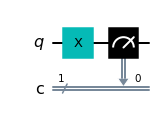

In [2]:
 ## For the Not Gate
qc_not = QuantumCircuit(1,1, name = 'qc')
qc_not.x(0)
qc_not.measure(0,0)
qc_not.draw('mpl')


Total counts are: {'1': 1000}


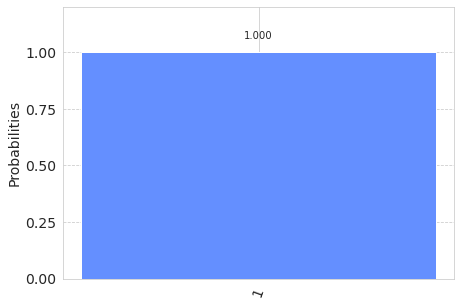

In [3]:
 ## to execute the qasm

backend = Aer.get_backend("qasm_simulator")
job = execute(qc_not, backend, shots=1000)
result = job.result()

counts = result.get_counts(qc_not)
print("\nTotal counts are:", counts)

## plot a histogram
plot_histogram(counts)

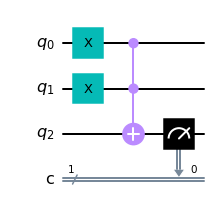

In [4]:
## The And Gate can be implemented using the tofoli
qc_and = QuantumCircuit(3,1, name = "qc")

qc_and.x(0)
qc_and.x(1)

qc_and.ccx(0,1,2)

qc_and.measure(2,0)
qc_and.draw('mpl')

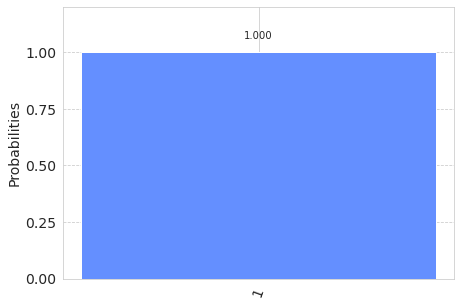

In [5]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_and, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc_and)
plot_histogram(counts)

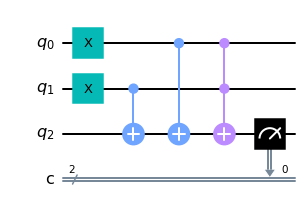

In [6]:
## For the OR gATE
qc_or = QuantumCircuit(3,2, name="qc")

qc_or.x(0)
qc_or.x(1)

qc_or.cx(1,2)
qc_or.cx(0,2)
qc_or.ccx(0,1,2)

qc_or.measure(2,0)

qc_or.draw('mpl')

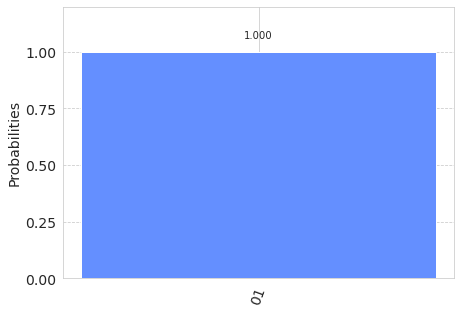

In [7]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_or, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc_or)
plot_histogram(counts)

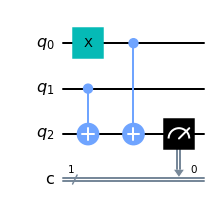

In [8]:
## Implementation of XOR gate with two cnots
qc_xor = QuantumCircuit(3,1, name= "qc")

qc_xor.x(0)

qc_xor.cx(1,2)
qc_xor.cx(0,2)

qc_xor.measure(2,0)

qc_xor.draw("mpl")

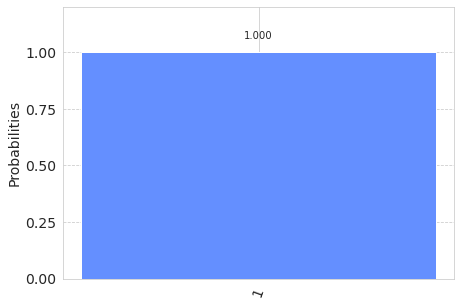

In [9]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_xor, backend, shots = 1000)
result = job.result()
counts = result.get_counts(qc_xor)

plot_histogram(counts)

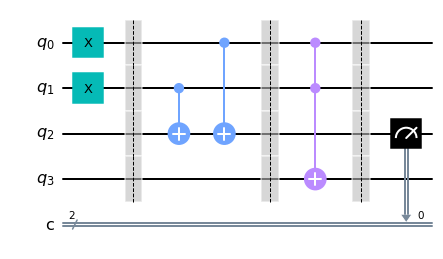

In [11]:
### Implementing HAlf Adder circuit

qc_ha = QuantumCircuit(4,2, name = "qc")

## Initialize qubits to |11>
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

##Xor implementation
qc_ha.cx(1,2)
qc_ha.cx(0,2)
qc_ha.barrier()

##AND Gate implementation
qc_ha.ccx(0,1,3)
qc_ha.barrier()

##Sum
qc_ha.measure(2,0)

qc_ha.draw('mpl')


Total counts are: {'00': 1000}


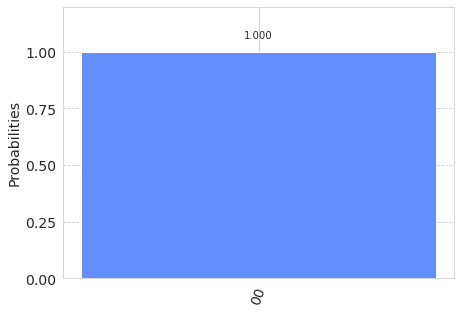

In [12]:
backend = Aer.get_backend("qasm_simulator")

job = execute(qc_ha, backend, shots = 1000)

result = job.result()

counts = result.get_counts(qc_ha)
print("\nTotal counts are:", counts)

plot_histogram(counts)

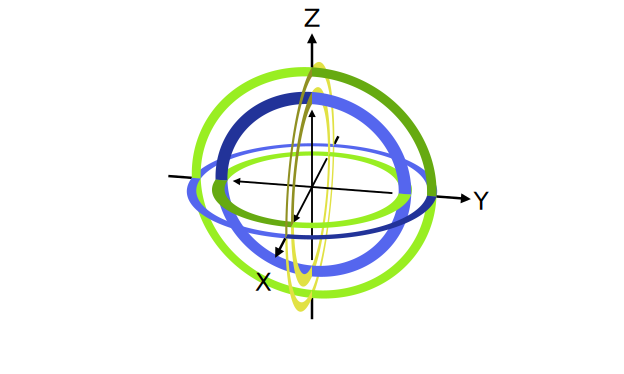

In [16]:
from bloch_sphere.animate_bloch import do_or_save_animation, AnimState
@do_or_save_animation('my_animation', save=False, fps=30, preview=True)

def animate(state: AnimState):
    state.x_gate()
    state.y_gate()
    state.z_gate()
    state.h_gate()
    ...
    state.wait()

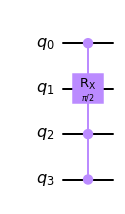

In [17]:
 from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import  HGate, IGate, RXGate


##Define custom gate
custom = RXGate(pi/2).control(3)

##Define quantum circuit
qc2 = QuantumCircuit(4)
qc2.append(custom, [0,2,3,1])
qc2.draw("mpl")

In [23]:
from ibm-quantum-widgets import CircuitComposer
editor = CircuitComposer
editor

SyntaxError: invalid syntax (4270991341.py, line 1)

In [18]:
## SYntax for running on real device

from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy


##set provider
provider = IBMQ.load_acount()
provider = IBMQ.get_provider('ibm-q')

In [ ]:
## Set device
device = least_busy(provider.backends(filters= lambda x: x.configurations().nqubits >=2 and
                                      not x.configurations().simulator and x.status().operational == True))

In [ ]:
print("RUnning on current least busy device: ", device)

## set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled, shots=1024)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)

In [9]:
from qiskit.visualization import plot_state_qsphere


## THIS IS A HELPER FUNCTION THAT AUTOMATES REPETITIVE STUFFS EXECUTING AND VISUALIZING THE CIRCUITS

##WIll execute the circuit on the state vector (sv) simulator
##Returns state vector resultsm circuit diagram, and QSphere


def execute_circuit_sv(quantum_circuit):
    ##create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')

    #execute the circuit on the simulator
    result = execute(quantum_circuit,statevector_simulator).result()
    ##Assign state vector results
    statevector_results = result.get_statevector(quantum_circuit)

    ##Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw('mpl')

    #draw the QSPhere
    q_sphere = plot_state_qsphere(statevector_results)

    ##Return the result, circuit diagram and Osphere
    return statevector_results, circuit_diagram, q_sphere

    ##

In [14]:
##I will use the helper function to execute the x gate operation
#X-gate
#Create the single qubit circuit

qc = QuantumCircuit(1)

#Add an X gate to the qubit
qc.x(0)
qc.z(0)
##Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)

In [15]:
result

Statevector([ 6.123234e-17+0.0000000e+00j, -1.000000e+00-1.2246468e-16j],
            dims=(2,))


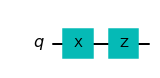

In [16]:
img

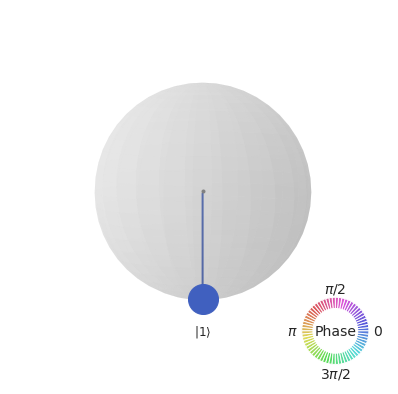

In [17]:
qsphere

In [18]:
##Helper function for qasm simulator

def execute_circuit(quantum_circuit):
    ##create a qasm simulator
    simulator = Aer.get_backend('qasm_simulator')

    ##execute the circuit on the simulator
    result = execute(quantum_circuit, simulator, shots=1024).result()

    ##Get the result counts
    results = result.get_counts(quantum_circuit)

    #draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()

    ##create a histogram of the results
    histogram = plot_histogram(results)

    ##return the results, circuit diagram, and histogram
    return result, circuit_diagram, histogram

In [19]:
## CNOT-gate
##create a two qubit circuit

qc = QuantumCircuit(2)
##Add a CNOT gate where, control = first, target = second qubit

qc.cx(0,1)

#measure all qubits and send results to classical bits
qc.measure_all()

##execute the circuit and capture all the results
result, img, histogram = execute_circuit_sv(qc)

In [20]:
result

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


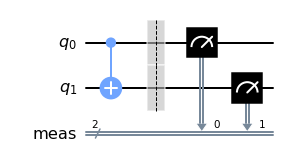

In [21]:
img

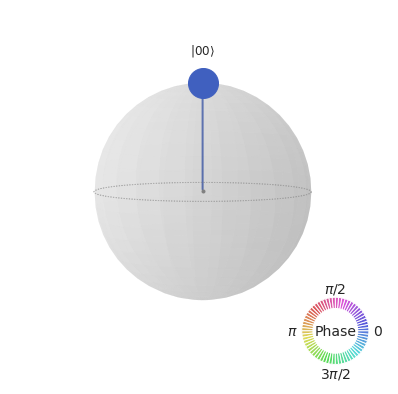

In [22]:
histogram

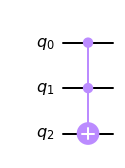

In [24]:
##Decomposition of a Toffoli gate
""" An analogy of this is to think of the Toffoli gate as a car. When you decompose a car down a level, you are now looking at the components that
make up the car, such as the engine, hood, wheels, seats, doors, rearview mirror and so on. The following steps will provide a  refresher to what
this looks like
"""

##Basic Toffoli gate,
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

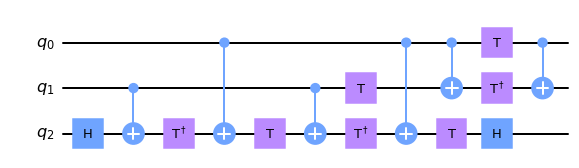

In [26]:
## To decompose the Toffoli gate down to level to its representative gates

qc_decompose = qc.decompose()
qc_decompose.draw('mpl')